In [137]:
# -------------------------------------
# --- Go to correct starting folder ---
# -------------------------------------
# (when running jupyter lab in the browser, the notebook starts with CWD = folder where it is located, which breaks imports, ...)
import os
import pathlib

while not ((cwd := pathlib.Path(os.getcwd())) / "pyproject.toml").exists():
    os.chdir(cwd.parent)  # go 1 folder up

In [138]:
import math
from functools import partial
from time import perf_counter_ns

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

from snuffled._core.analysis.function.function_analyser import FunctionAnalyser, FunctionSampler
from snuffled._core.utils.statistics import estimate_sign_flip_frequency

plt.rcParams["figure.dpi"] = 300

In [139]:
def f_sine(x: float, c: float) -> float:
    return math.sin(c * x)

In [140]:
c = 10000
fun = partial(f_sine, c=c)
function_sampler = FunctionSampler(fun=fun, x_min=-1, x_max=1, dx=1e-10, n_fun_samples=1_000, seed=perf_counter_ns())

In [141]:
# now assume some lambda value
# with lambda = number of occurrences over unit interval
_lambda = 1


def prob_even(w: float) -> float:
    return 0.5 * (1 - math.exp(-2 * w * _lambda))

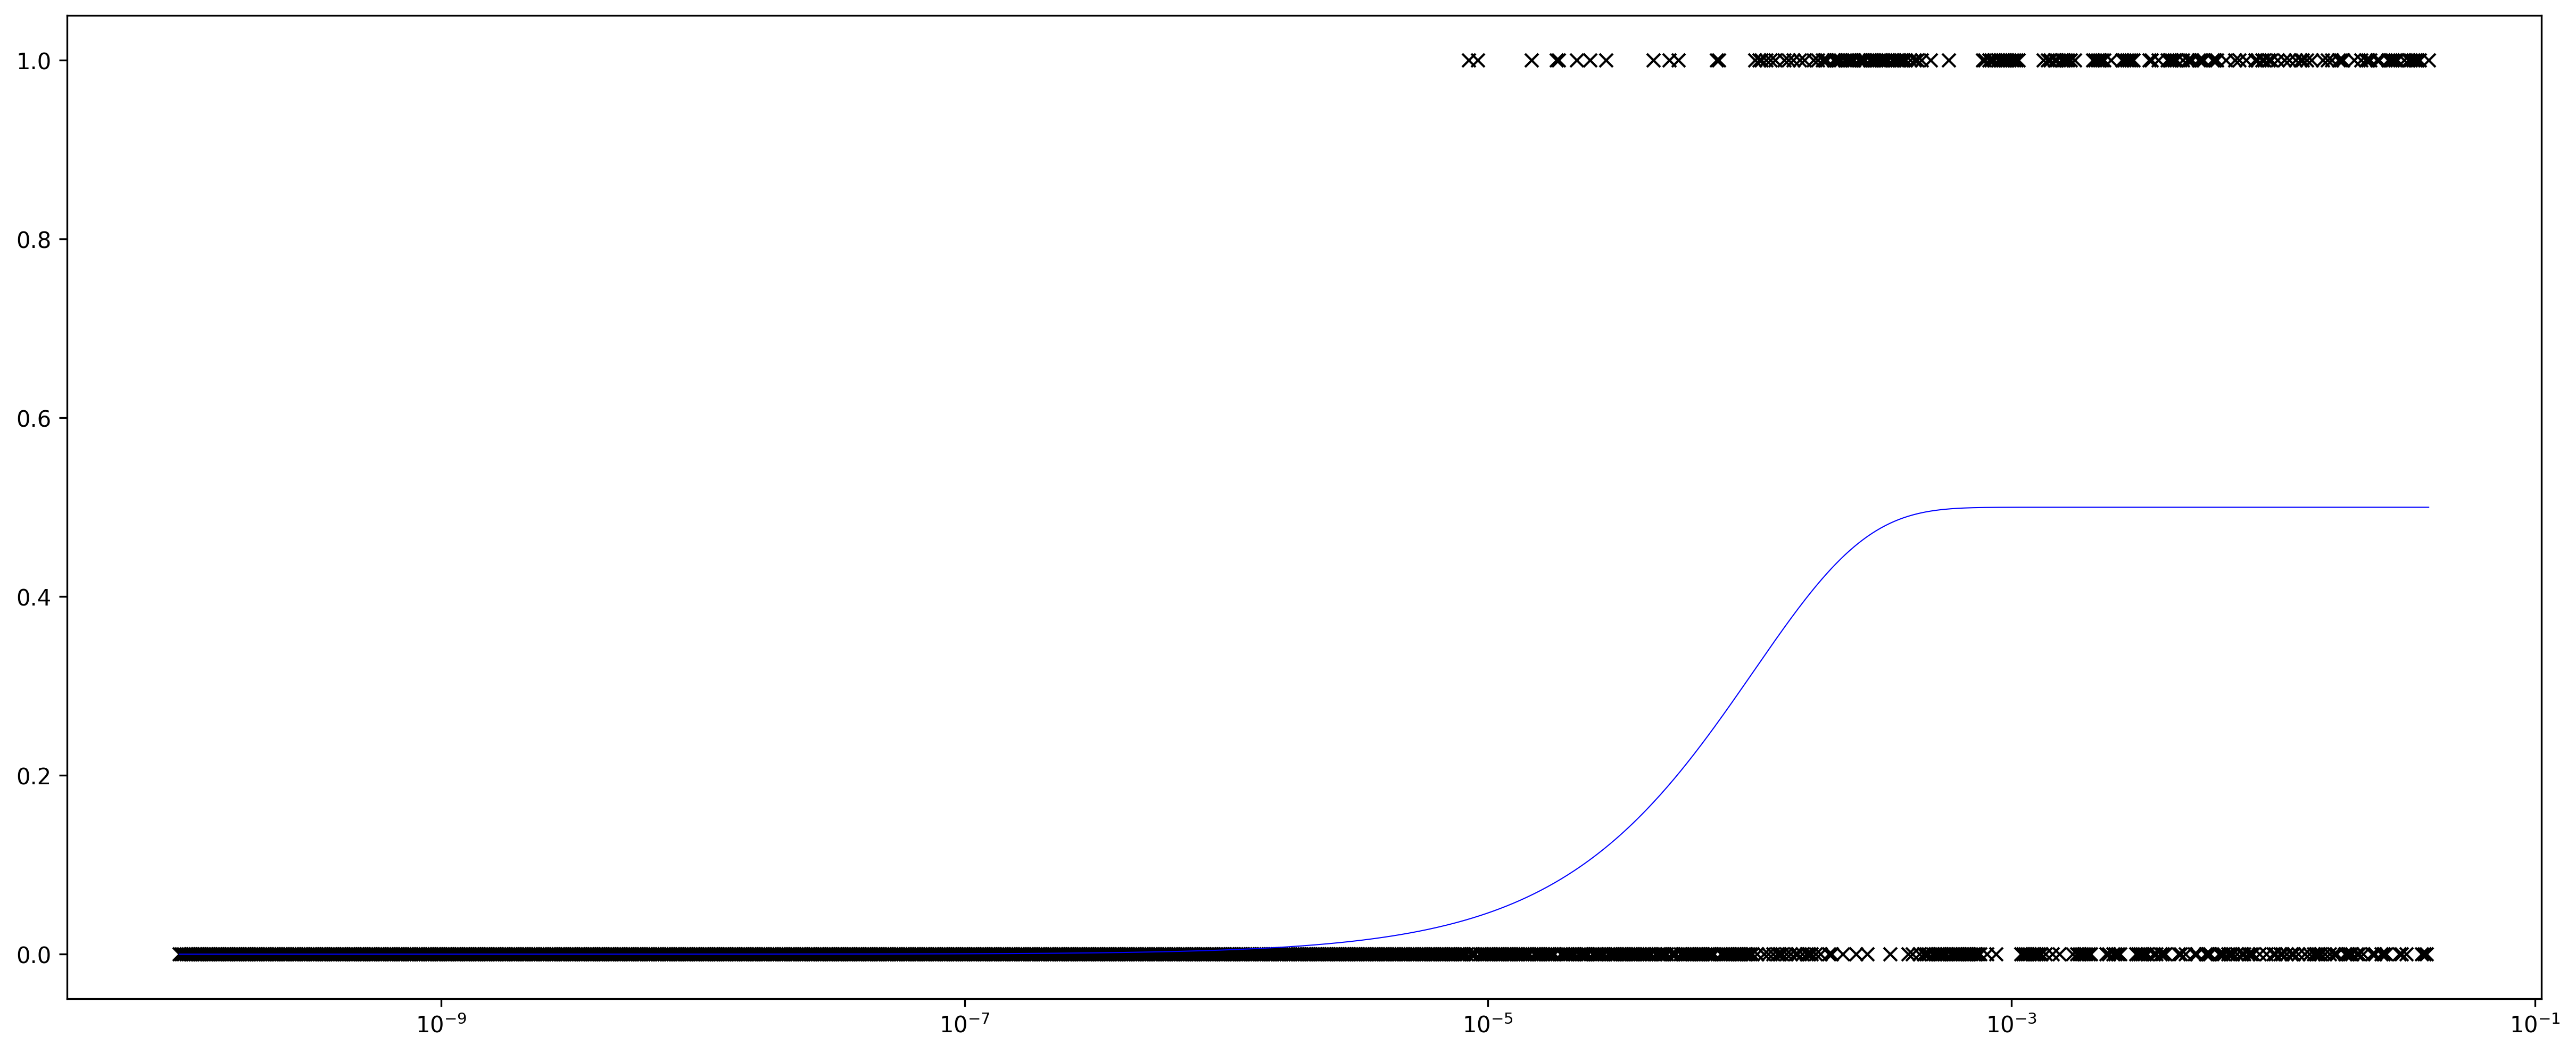

In [142]:
# get 'multiscale'-tuples
x_values = function_sampler.x_values()
fx_values = function_sampler.fx_values()

# get samples as tuples
x_fx = list(zip(x_values, fx_values))
x_fx = [(x, fx) for x, fx in x_fx if fx != 0.0]

# construct intervals
intervals = [
    (x_left, x_right, fx_left, fx_right) for (x_left, fx_left), (x_right, fx_right) in zip(x_fx[:-1], x_fx[1:])
]

# construct observations
observations = [
    (x_right - x_left, 0.0) if fx_left * fx_right > 0 else (x_right - x_left, 1.0)
    for (x_left, x_right, fx_left, fx_right) in intervals
]
observations = sorted(observations)
w = np.array([w for (w, p) in observations])
p = np.array([p for (w, p) in observations])

# construct probabilities
_lambda = estimate_sign_flip_frequency(w, p, lambda_min=1e-2, lambda_max=1e12, n_iters=5)
p_model = [prob_even(w_i) for w_i in w]

# plot observations
fig, ax = plt.subplots(1, 1)

ax.semilogx()
ax.plot(w, p, ls=None, marker="x", c="k", lw=0)
ax.plot(w, p_model, lw=0.5, c=(0, 0, 1))

fig.set_size_inches(w=20, h=8)

In [143]:
print(_lambda)

4843.663172620451


In [144]:
roots_per_unit = c / math.pi
roots_per_unit

3183.098861837907

In [145]:
_lambda / roots_per_unit

1.521681663956784

In [146]:
math.log(1 / 2)

-0.6931471805599453